In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()

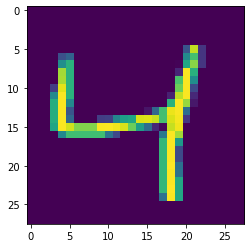

In [4]:
plt.imshow(X_train[2])

In [5]:
only_zeros = X_train[y_train==0]

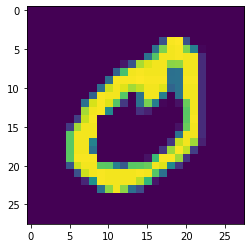

In [6]:
plt.imshow(only_zeros[1])

In [7]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.models import Sequential

In [8]:
discriminator = Sequential()
discriminator.add(Flatten(input_shape=[28,28]))
discriminator.add(Dense(150,activation='relu'))
discriminator.add(Dense(100,activation='relu'))

discriminator.add(Dense(1,activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy',optimizer='adam')

In [9]:
coding_size=100

generator = Sequential()
generator.add(Dense(100,activation='relu',input_shape=[coding_size]))
generator.add(Dense(150,activation='relu'))
generator.add(Dense(784,activation='relu'))
generator.add(Reshape([28,28]))

In [10]:
GAN = Sequential([generator,discriminator])


In [11]:
discriminator.trainable = False

In [12]:
GAN.compile(loss='binary_crossentropy',optimizer='adam')

In [13]:
batch_size = 32


In [14]:
my_data = only_zeros

In [15]:
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000)


In [17]:
dataset = dataset.batch(batch_size,drop_remainder=True).prefetch(1)


In [18]:
epochs=1

In [19]:
GAN.layers

In [20]:
GAN.layers[0].layers

In [21]:
generator , discriminator = GAN.layers

In [22]:
for epochs in range(epochs):
    print(f"Currently on {epochs+1}")
    i=0
    
    for X_batch in dataset:
        i=i+1
        if(i%100==0):
            print(f"Currently on batch no.{i}")
            
        #Discriminator Training Phase
        noise = tf.random.normal(shape=[batch_size,coding_size])
        gen_images= generator(noise)
        
        X_fake_vs_real = tf.concat([gen_images,tf.dtypes.cast(X_batch,tf.float32)],axis=0)
        
        y1 = tf.constant([[0.0]]*batch_size + [[1.0]]*batch_size)
        
        discriminator.trainable=True
        
        discriminator.train_on_batch(X_fake_vs_real,y1)
        
        #Train generator
        noise = tf.random.normal(shape=[batch_size,coding_size])
        y2 = tf.constant([[1.0]]*batch_size)
        
        discriminator.trainable= False
        
        GAN.train_on_batch(noise,y2)
        
        

Currently on 1
Currently on batch no.100


In [23]:
noise  = tf.random.normal(shape=[10,coding_size])


In [25]:
noise.shape

TensorShape([10, 100])

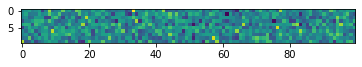

In [26]:
plt.imshow(noise)

In [27]:
images = generator(noise)

In [28]:
images.shape


TensorShape([10, 28, 28])

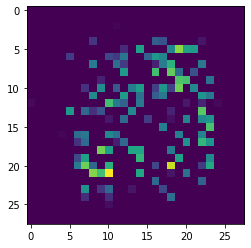

In [29]:
plt.imshow(images[0])